# Part I 머신러닝
# chapter 6 결정 트리

* 결정 트리(decision tree)

    SVM과 유사하게 분류와 회귀 작업 그리고 다중 출력 작업도 가능한 다재다능한 머신러닝 알고리즘이다
    매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘

In [7]:
# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 6.1 결정 트리 학습과 시각화

In [8]:
#붓꽃 데이터셋에 DecisionTreeClassifier를 훈련시키기기
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [10]:
!pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 1.1 MB/s eta 0:00:00


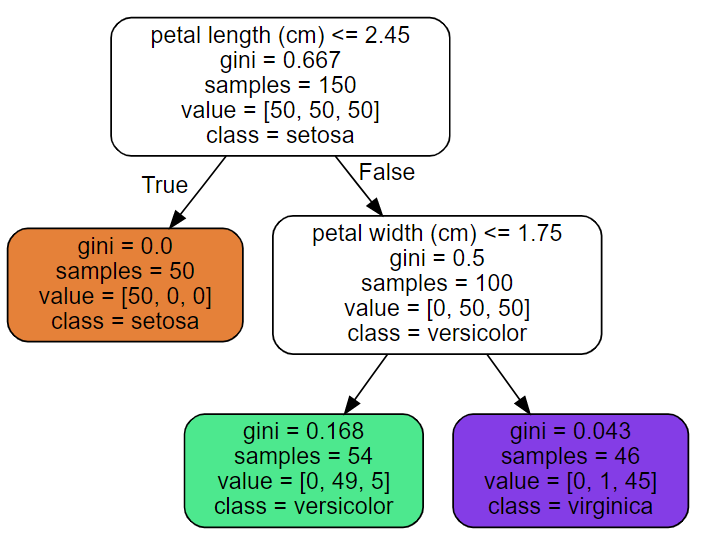

In [12]:
from IPython.display import Image
Image('D_T.png')

루트 노드(rood node) : 깊이가 0인 맨 꼭대기의 노드, 시작점

리프 노드(leaf node) : 자식 노드를 가지지 않는 노드. 추가적인 검사를 하지 않는다.

## 6.2 예측하기

    사이킷런은 이진트리만 만드는 CART알고리즘을 사용한다. 그러므로 리프 노드 외의 모든 노드는 자식 노드를 두개씩 가진다.
    하지만 ID3같은 알고리즘은 둘 이상의 자식 노드를 가진 결정트리를 만들 수 있다.

그림 저장: decision_tree_decision_boundaries_plot


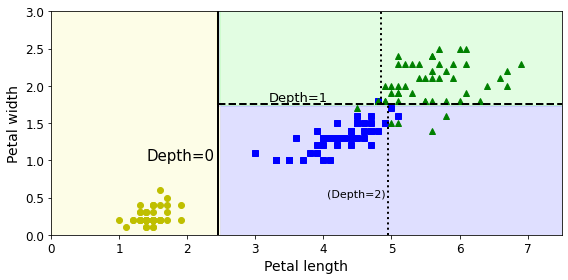

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

## 6.3 클래스 확률 추정

In [15]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [18]:
tree_clf.predict([[5,1.5]])

array([1])

## 6.4 CART 훈련 알고리즘

CART(classification and regression tree) : 걸정트리를 훈련시키기 위해(트리를 성장시키기 위해) 사용
    
    Cart 알고리즘이 훈련 세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 또 나누고 그 다음엔 서브셋의 서브셋을 나구고 이런식으로 반복 => 최대깊이(max_depth 매개변수로 정의된)가 되면 중지하거나 불순도를 줄이는 분할을 찾을 수 없을 때 멈추게 된다.

## 6.5 계산 복잡도

일반적으로 결정 트리는 거의 균형을 이루고 있으므로 결정 트리를 탐색하기 위해서는 약 O(log(m)/log(2))개의 노드를 거쳐야 한다.

특성위 수와 무관하게 같기 때문에 큰 훈련세트를 다룰 때도 예측 속도가 매우 빠르다

각 노드에서 모든 훈련 샘플의 모든 특성을 비교

## 6.6 지니  불순도 또는 엔트로피?

기본적으로 지니 불순도가 사용되지만 criterion 매개변수를 "entropy"로 지정하여 엔트로피 불순도를 사용할 수 있다.

어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피가 0

지니 불순도가 조금 더 계산이 빠르기 때문에 default로 좋다

지니 불순도가 가장 빈도 높은 클래스를 한쪽 가지로 고립 시키는 경향이 있는 반면에 엔트로피는 조금 더 균형 잡힌 트리를 만든다.

## 6.7 규제 매개변수

결정 트리는 훈련 데이터에 대한 제약 사항이 거의 없다. 따라서 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대 적합이 되기 쉽다.

* 비파라미터모델(nonparameter model) : 훈련되기전에 파라미터 수가 결정 되지 않은 모델

* 파라미터모델(parameter model) : 미리 정의 된 모델 파라미터 수를 가지므로 자윧가 제한되고 과대 적합될 위험이 줄어듬(하지만 과소 적합될 위험은 커짐)

그림 저장: min_samples_leaf_plot


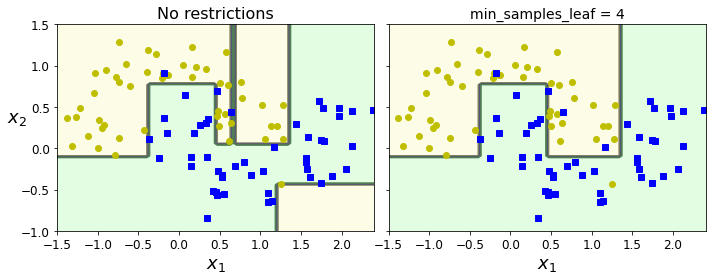

In [22]:
#min_sample_leaf 매개변수를 사용한 규제
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

왼쪽은 기본 매개변수를 사용하여 훈련(규제 X)

오른쪽은 min_samples_leaf=4 로 지정하여 훈련 시켰다

왼쪽모델이 확실히 과대 적합 되어있다.

제한 없이 결정트리를 훈련시키고 불필요한 노드를 가지치기(pushing, 제거)하는 알고리즘도 있다.

## 6.8 회귀

In [23]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

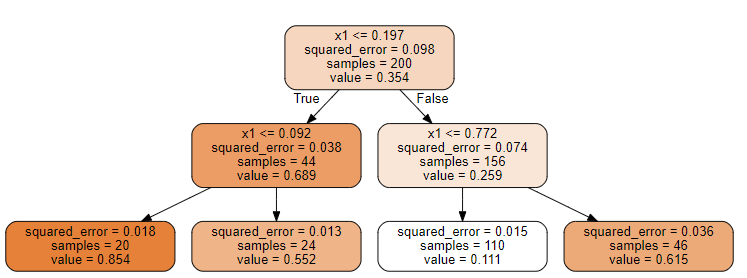

In [26]:
Image('6.4.png')
#회귀 결정트리

그림 저장: tree_regression_plot


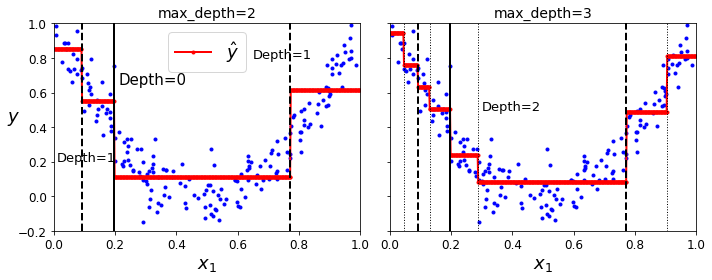

In [27]:
#두 개의 결정 트리 회귀 모델의 예측
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

그림 저장: tree_regression_regularization_plot


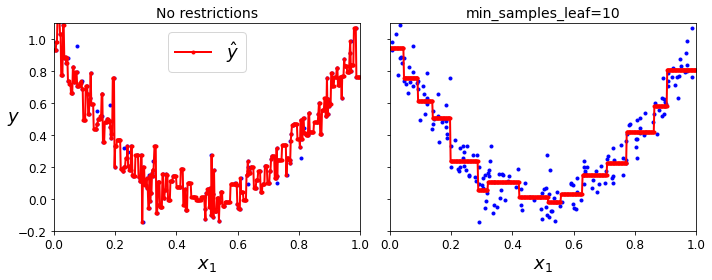

In [28]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

결정 트리 회귀 모델의 규제를 진행한 그래프

## 6.9 불안정성

그림 저장: sensitivity_to_rotation_plot


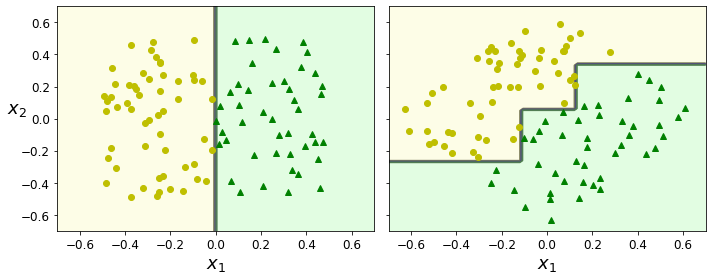

In [29]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

결정트리는 계단 모양의 결정 경계를 만든다

그래서 훈련 세트의 회전에 민감하다

결정트리의 주된 문제는 훈련 데이터에 있는 작은 변화에도 매우 민감하다는 것이다.

## 6.10 연습문제

1. 백만 개의 샘플을 가진 훈련 세트에서 (규제 없이) 훈련시킨 결정 트리의 깊이는 대략 얼마일까요?

    m개의 리프 노드를 포함한 균형이 잘 잡힌 이진 트리의 깊이는 log2(m)을 반올림 한 것과 같다. 
    이진 결정트리(사이킷런에 있는 모든 트리는 가지가 두개입니다.)를 제한을 두지 않고 훈련시키면 훈련 샘플마다 하나의 리프 노드가 되므로 어느 정도 균형이 잡힌 트리가 된다. 
    따라서 훈련 세트에 백만 개 샘플이 있다면 결정 트리의 깊이는 log2(10**6) ~~ 20 이 될것이다.
    (실제로는 완벽하게 균형 잡힌 트리가 만들어 지지 않기 때문에 조금 더 늘어난다.)

2. 한 노드의 지니 불순도가 보통 그 부모 노드보다 작을까요, 아니면 클까요? 일반적으로 작거나 클까요, 아니면 항상 작거나 클까요?

    한 노드의 불순도는 일반적으로 부모의 불순도보다 낮다.
    이는 자식의 지니 불순도의 가중치 합이 최소화 되는 방향으로 각 노드를 분할하는 CART 훈련 알고리즘의 비용함수 때문이다.
    그러나 다른 자식 노드의 지니 불순도 감소량이 어떤 노드의 불순도 증가량보다 큰 경우라면 부모의 불순도보다 큰 노드가 생길 수 있다.
    예를 들어 클래스 A의 샘플 4개, 클래스 B의 샘플을 1개 포함한 노드를 생각해보자.
    이 노드의 불순도는 1-(1/5)^2-(4/5))^2 = 0.32 이다.
    이 데이터셋은 1차원이고 A, B, A, A, A 순으로 늘어서 있다고 가정하자.
    알고리즘이 이 노드를 두 번째샘플 이후에 나누어 샘플 A,B를 가진 자식 노드와 샘플 A,A,A를 가진 자식 노드를 만든다.
    첫번째 자식 노드의 지니 불순도는 1-(1/2)^2-(1/2)^2=0.5 가 되므로 부모보다 크다.
    이는 다른 노드가 순수 노드가 되는 것에 대한 대가이다.
    가중치를 준 전체 지니 불순도는 2/5 * 0.5 + 3/5 * 0 = 0.2 가 되어 부모의 지니 불순도 보다 낮다.

3. 결정 트리가 훈련 세트에 과대적합되었다면 max_depth를 줄이는 것이 좋을까요?

    결정 트리가 훈련 세트에 과대 적합되었다면 모델에 제약을 가해 규제해야 하므로 max_depth를 낮추는 것이 좋다.

4. 결정 트리가 훈련 세트에 과소적합되었다면 입력 특성의 스케일을 조정하는 것이 좋을까 요?

    결정 트리는 훈련 데이터의 스케일이나 원점에 맞추어져 있는지 상관하지 않습니다.
    이것이 결정 트리의 장점 중 하나입니다.
    그러므로 결정 트리가 훈련 세트에 과소적합되었다고 입력 특성의 스케일을 조정하는 것은 시간 낭비 입니다.

5. 백만 개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는 데 한 시간이 걸렸다면, 천만 개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는 데는 대략 얼마나 걸릴까요?

    결정 트리 훈련의 계산 복잡도는 O(n*m*log2(m))이다.
    그러므로 훈련 세트의 크기에 10을 곱하면 10*log2(10m)/log2(m)배 만큼들어난다
    만약 m=10**6이면 대략 11.7시간이 걸릴 것으로 예상된다.

6. 십만 개의 샘플을 가진 훈련 세트가 있다면 presort=True로 지정하는 것이 훈련 속도를 높일까요?

    데이터셋의 샘플 수가 수천 개 미만일 때 훈련 세트를 사전에 정렬하여 훈련 속도를 높일 수 있다.
    100,000개의 샘플을 포함하고 있을때 presort=True로 지정하면 훈련 속도가 매우 느려질것이다.

7. 다음 단계를 따라 moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해보세요.

    a. make_moons(n_samples=1000, noise=0.4)를 사용해 데이터셋을 생성합니다.
    b. 이를 train_test_split()을 사용해 훈련 세트와 테스트 세트로 나눕니다.
    c. DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행합니다(GridSearchCV를 사용하면 됩니다). 힌트: 여러 가지 max_leaf_ nodes 값을 시도해보세요.
    d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정합니다. 대략 85~87%의 정확도가 나올 것입니다.

a. make_moons(n_samples=1000, noise=0.4)를 사용해 데이터셋을 생성합니다.

In [30]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. 이를 train_test_split()을 사용해 훈련 세트와 테스트 세트로 나눕니다.

In [31]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 42)

c. DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행합니다(GridSearchCV를 사용하면 됩니다). 힌트: 여러 가지 max_leaf_ nodes 값을 시도해보세요.

In [32]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2,100)), 'min_samples_split': [2,3,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [33]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정합니다. 대략 85~87%의 정확도가 나올 것입니다.

In [34]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

8. 다음 단계를 따라 랜덤 포레스트를 만들어보세요.

    a. 이전 연습문제에 이어서, 훈련 세트의 서브셋을 1,000개 생성합니다. 각각은 무작위로 선택된 100개의 샘플을 담고 있습니다. 힌트: 사이킷런의 ShuffleSplit을 사용할 수있습니다.
    b. 이전 연습문제에서 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리를 훈련시킵 니다. 테스트 세트로 이 1,000개의 결정 트리를 평가합니다. 더 작은 데이터셋에서 훈련되었기 때문에 이 결정 트리는 앞서 만든 결정 트리보다 성능이 떨어져 약 80%의 정확도를 냅니다.
    c. 이제 마술을 부릴 차례입니다. 각 테스트 세트 샘플에 대해 1,000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취합니다(사이파이의 mode() 함수를 사용할 수 있습니 다). 그러면 테스트 세트에 대한 다수결 예측 majority-vote prediction 이 만들어집니다.
    d. 테스트 세트에서 이 예측을 평가합니다. 앞서 만든 모델보다 조금 높은(약 0.5~1.5%
    정도) 정확도를 얻게 될 것입니다. 축하합니다. 랜덤 포레스트 분류기를 훈련시켰습 니다!


a. 이전 연습문제에 이어서, 훈련 세트의 서브셋을 1,000개 생성합니다. 각각은 무작위로 선택된 100개의 샘플을 담고 있습니다. 힌트: 사이킷런의 ShuffleSplit을 사용할 수있습니다.

In [35]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. 앞에서 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리를 훈련시킵니다. 테스트 세트로 이 1,000개의 결정 트리를 평가합니다. 더 작은 데이터셋에서 훈련되었기 때문에 이 결정 트리는 앞서 만든 결정 트리보다 성능이 떨어져 약 80%의 정확도를 냅니다.

In [36]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores=[]

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.8054499999999999

c. 이제 마술을 부릴 차례입니다. 각 테스트 세트 샘플에 대해 1,000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취합니다(사이파이의 mode() 함수를 사용할 수 있습니다). 그러면 테스트 세트에 대한 _다수결 예측_이 만들어집니다.

In [37]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [38]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

d. 테스트 세트에서 이 예측을 평가합니다. 앞서 만든 모델보다 조금 높은(약 0.5~1.5% 정도) 정확도를 얻게 될 것입니다. 축하합니다. 랜덤 포레스트 분류기를 훈련시켰습니다!

In [39]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872